In [1]:
# Import pandas for data processing
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import multilabel_confusion_matrix
from sklearn import ensemble
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# Read the dataset
data_studentclusters = pd.read_csv('studentclusters.csv')

In [3]:
data_studentclusters.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


In [4]:
data_studentclusters.isnull().sum()

marks     0
shours    0
dtype: int64

In [5]:
data_studentclusters.dtypes

marks       int64
shours    float64
dtype: object

In [6]:
data_studentclusters.describe()

,marks,shours
count,49.000000,49.000000
mean,50.938776,15.397959
std,20.011880,7.169800
min,20.000000,2.000000
25%,37.000000,9.000000
50%,49.000000,16.000000
75%,64.000000,21.000000
max,93.000000,30.000000


In [7]:
x = data_studentclusters.iloc[:, 1]
y = data_studentclusters.iloc[:, 0]
x 


0     20.0
1     19.0
2      7.0
3     22.0
4     20.0
5     15.0
6      8.0
7     24.0
8     26.0
9      7.0
10    30.0
11     8.0
12    18.0
13    23.0
14    22.0
15    16.0
16    15.0
17    23.0
18    17.0
19    21.0
20    21.0
21     7.5
22    17.0
23    15.0
24    18.0
25     5.0
26    16.0
27    14.0
28    27.0
29    17.0
30     3.0
31     4.0
32     9.0
33     2.0
34    14.0
35     2.0
36    16.0
37    14.0
38    16.0
39    10.0
40     4.0
41    18.0
42    23.0
43    16.0
44    26.0
45    17.0
46    16.0
47     5.0
48    21.0
Name: shours, dtype: float64

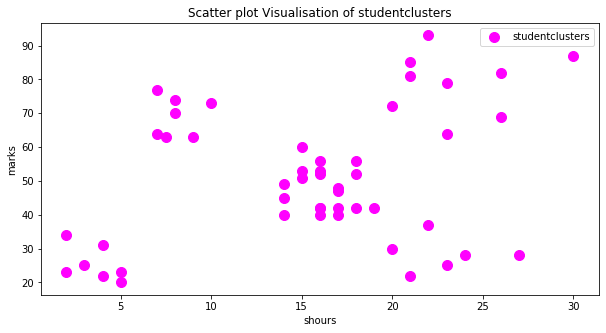

In [8]:
# Visualise the data using Scatter plot
#plt.plot(x,y)
fig = plt.figure(figsize = (10,5))
plt.xlabel('shours')
plt.ylabel('marks')
plt.title('Scatter plot Visualisation of studentclusters')
plt.scatter(x, y, s=100, c = 'magenta', label = 'studentclusters')

plt.legend()
plt.show()

In [9]:
# Fit and Transform the data for MinMax normalization
scaler_studentclusters = MinMaxScaler()
rescaled_X = scaler_studentclusters.fit_transform(data_studentclusters)
rescaled_X

array([[0.71232877, 0.64285714],
       [0.30136986, 0.60714286],
       [0.78082192, 0.17857143],
       [1.        , 0.71428571],
       [0.1369863 , 0.64285714],
       [0.45205479, 0.46428571],
       [0.73972603, 0.21428571],
       [0.10958904, 0.78571429],
       [0.67123288, 0.85714286],
       [0.60273973, 0.17857143],
       [0.91780822, 1.        ],
       [0.68493151, 0.21428571],
       [0.30136986, 0.57142857],
       [0.80821918, 0.75      ],
       [0.23287671, 0.71428571],
       [0.43835616, 0.5       ],
       [0.42465753, 0.46428571],
       [0.06849315, 0.75      ],
       [0.38356164, 0.53571429],
       [0.89041096, 0.67857143],
       [0.02739726, 0.67857143],
       [0.5890411 , 0.19642857],
       [0.30136986, 0.53571429],
       [0.54794521, 0.46428571],
       [0.49315068, 0.57142857],
       [0.04109589, 0.10714286],
       [0.30136986, 0.5       ],
       [0.2739726 , 0.42857143],
       [0.10958904, 0.89285714],
       [0.36986301, 0.53571429],
       [0.

In [10]:
# import KMeans for clustering
kmeans = KMeans(n_clusters = 5)

    

In [11]:
# Fit the input data. Create labels and get inertia
kmeans.fit(rescaled_X)
inertia = kmeans.inertia_
labels = kmeans.labels_



In [12]:
kmeans.cluster_centers_

array([[0.37808219, 0.50714286],
       [0.80974125, 0.76984127],
       [0.07436399, 0.05612245],
       [0.67318982, 0.21683673],
       [0.11415525, 0.74404762]])

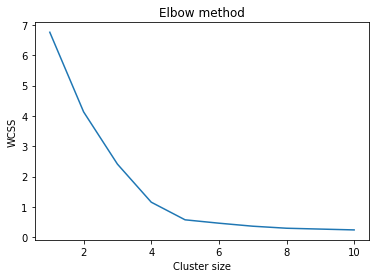

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rescaled_X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11),wcss)
plt.title('Elbow method')
plt.xlabel('Cluster size')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Squared Sum (Inertia)')

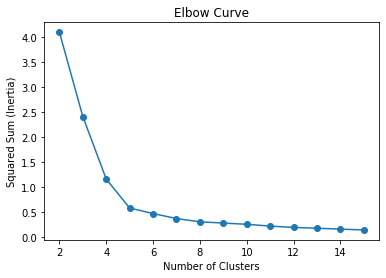

In [14]:
inertia = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rescaled_X)
    inertia.append(kmeans.inertia_)
    

plt.plot(range(2,16), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Sum (Inertia)')

In [15]:
# Elbow method to determine optimum clusters


# Behbud_Hamzayev